# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Summary of Weather.csv')

# Display basic information about the dataset
df_info = df.info()

C:\Users\sherr\AppData\Local\Temp\ipykernel_15424\1764730862.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [2]:
# Display the first few rows of the dataset
df_head = df.head()
df_head

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(119040, 31)

In [4]:
# Display summary statistics
df_description = df.describe()
df_description

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

## 2. Clean the dataset, drop variables

In [6]:
# Drop columns with either all missing values or >95% missingness
threshold = 0.95
missing_ratio = df.isnull().sum() / len(df)
columns_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,TSHDSBRSGF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,78.0,72.0,75.0,0.0,NaN
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,84.0,71.0,78.0,0.0,NaN
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,79.0,72.0,76.0,0.0,NaN
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,80.0,72.0,76.0,0.0,NaN
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,80.0,71.0,76.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,83.0,65.0,74.0,0.0,NaN
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,85.0,65.0,75.0,0.0,1.0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,83.0,65.0,74.0,0.0,1.0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,83.0,65.0,74.0,0.0,NaN


In [7]:
# Display the remaining columns and their missing value counts
remaining_missing = df_cleaned.isnull().sum()
remaining_columns = df_cleaned.columns.tolist()
# Print remaining columns and their missing value counts
print("Remaining Columns:\n")
for col in remaining_columns:
    print(f"{col}")

print("\nMissing Values per Column:\n")
print(remaining_missing)

Remaining Columns:

STA
Date
Precip
MaxTemp
MinTemp
MeanTemp
Snowfall
PoorWeather
YR
MO
DA
PRCP
MAX
MIN
MEA
SNF
TSHDSBRSGF

Missing Values per Column:

STA                0
Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall        1163
PoorWeather    84803
YR                 0
MO                 0
DA                 0
PRCP            1932
MAX              474
MIN              468
MEA              498
SNF             1163
TSHDSBRSGF     84803
dtype: int64


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Make a copy to work with
df_iterative = df_cleaned.copy()

# Convert applicable columns to numeric (force errors='coerce' to handle non-numeric entries)
cols_to_convert = ['Precip', 'Snowfall', 'PRCP', 'SNF', 'PoorWeather', 'TSHDSBRSGF']
for col in cols_to_convert:
    df_iterative[col] = pd.to_numeric(df_iterative[col], errors='coerce')

# Drop non-numeric and date columns before imputation
non_numeric_cols = ['Date']
df_numeric_only = df_iterative.drop(columns=non_numeric_cols)

# Apply IterativeImputer
imp = IterativeImputer(random_state=0)
imputed_array = imp.fit_transform(df_numeric_only)

# Convert back to DataFrame
df_imputed = pd.DataFrame(imputed_array, columns=df_numeric_only.columns)

# Add back the non-numeric columns
df_imputed['Date'] = df_iterative['Date'].values

# Check remaining missing values
final_missing = df_imputed.isnull().sum()
final_missing

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


STA            0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall       0
PoorWeather    0
YR             0
MO             0
DA             0
PRCP           0
MAX            0
MIN            0
MEA            0
SNF            0
TSHDSBRSGF     0
Date           0
dtype: int64

## 3. Select the feature(s) for the model, and explain the reason

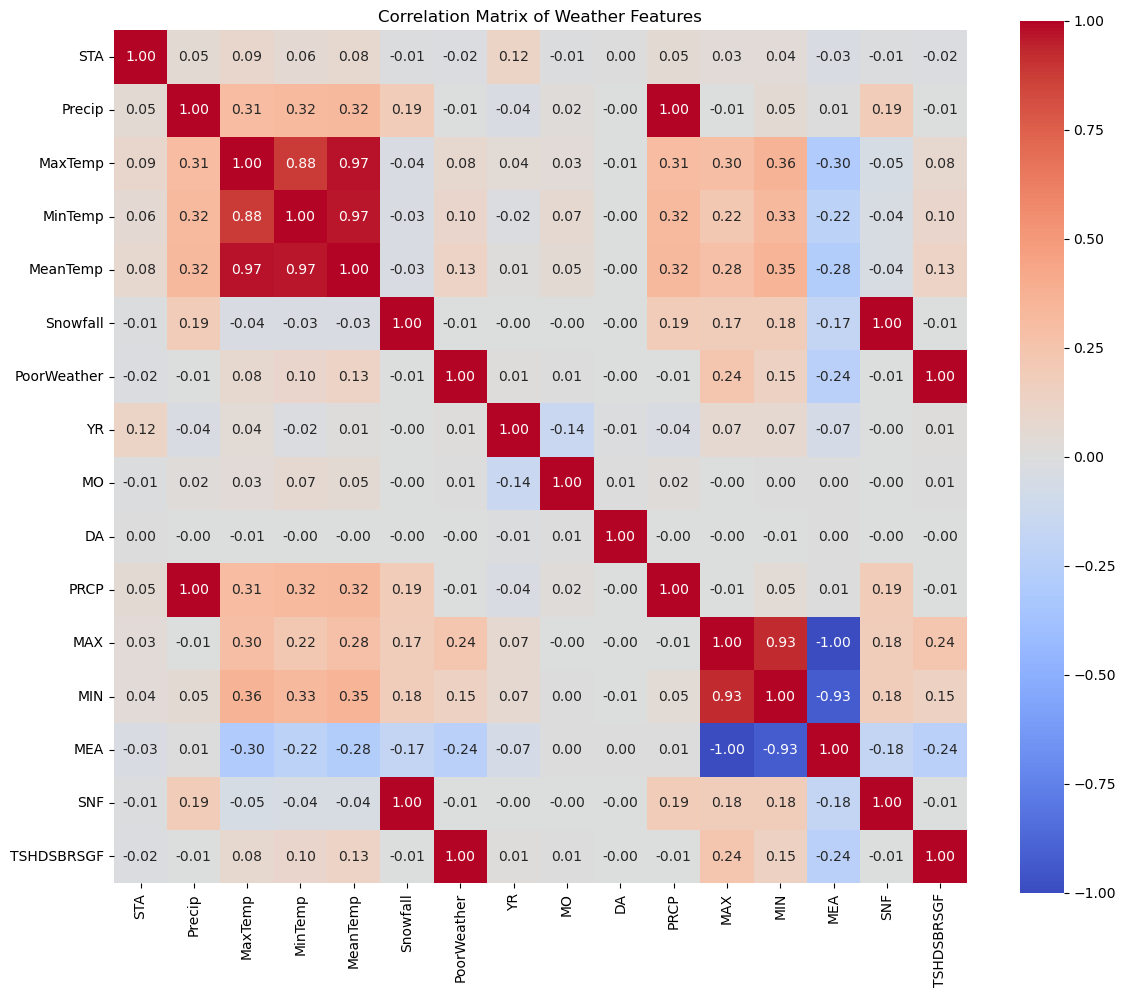

Correlation with MinTemp:

MinTemp        1.000000
MeanTemp       0.965425
MaxTemp        0.878384
MIN            0.326342
Precip         0.315805
PRCP           0.315321
MAX            0.224890
PoorWeather    0.096095
TSHDSBRSGF     0.096095
MO             0.069078
STA            0.059319
DA            -0.002576
YR            -0.020733
Snowfall      -0.032890
SNF           -0.043580
MEA           -0.224890
Name: MinTemp, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_imputed.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Weather Features")
plt.tight_layout()
plt.show()

# Correlation with target variable MinTemp
target_corr = correlation_matrix["MinTemp"].sort_values(ascending=False)
print("Correlation with MinTemp:\n")
print(target_corr)

In [10]:
#These features have strong positive correlations with MinTemp and are selected for modeling:
#MeanTemp (r = 0.965): Most powerful predictor — closely related to daily temperature patterns.
#MaxTemp (r = 0.878):Strong correlation; warmer max temperatures usually indicate warmer minimums overnight.
#MIN (r = 0.326): Moderate relationship. May reflect prior day's minimum or a similar feature — useful but less powerful than the two above.
#Precip (r = 0.316) and PRCP (r = 0.315): Moderate correlation — may reflect how cloud cover affects night temperatures.

#MAX, PoorWeather, TSHDSBRSGF, MO, STA have weak correlations (< 0.25).
#Snowfall, SNF, MEA show negative or near-zero correlations and are not recommended.

#For training a predictive model for MinTemp, the following variables are selected:
#MeanTemp, MaxTemp,MIN,Precip and PRCP

## 4. Split the dataset (80% for training, 20% for testing)

In [11]:
from sklearn.model_selection import train_test_split

# Define the selected features and target
selected_features = ['MeanTemp', 'MaxTemp', 'MIN', 'Precip', 'PRCP']
target_variable = 'MinTemp'

X = df_imputed[selected_features]
y = df_imputed[target_variable]

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((95232, 5), (23808, 5), (95232,), (23808,))

## 5. Choose the algorithm, train and test the model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, rmse


(0.9895039526579594, 0.8497304994819367)

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_rf_pred = rf_model.predict(X_test)

# Evaluate performance
r2_rf = r2_score(y_test, y_rf_pred)
rmse_rf = mean_squared_error(y_test, y_rf_pred, squared=False)

r2_rf, rmse_rf


(0.9999908185800163, 0.025131779641250823)

## 6. Evaluate and Visualize model Performance

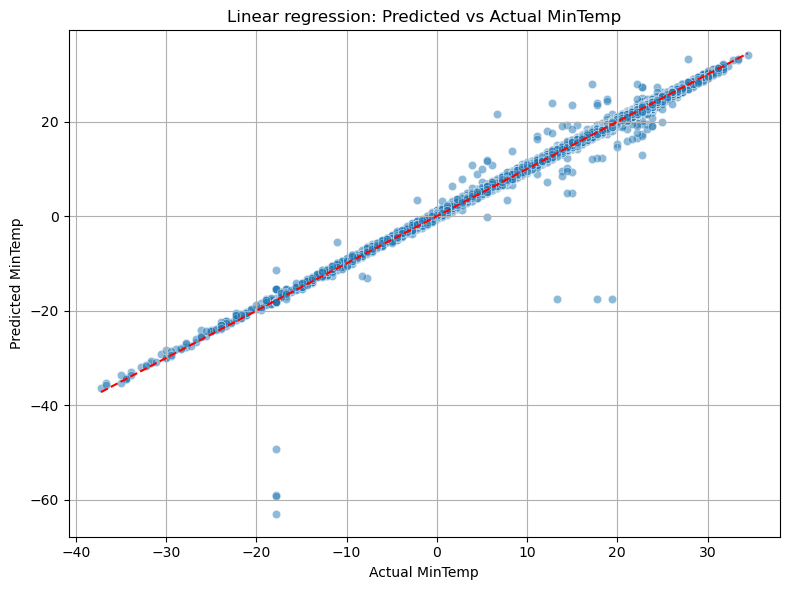

In [14]:
# Visualization: Predicted vs Actual values for linear regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("Linear regression: Predicted vs Actual MinTemp")
plt.grid(True)
plt.tight_layout()
plt.show()


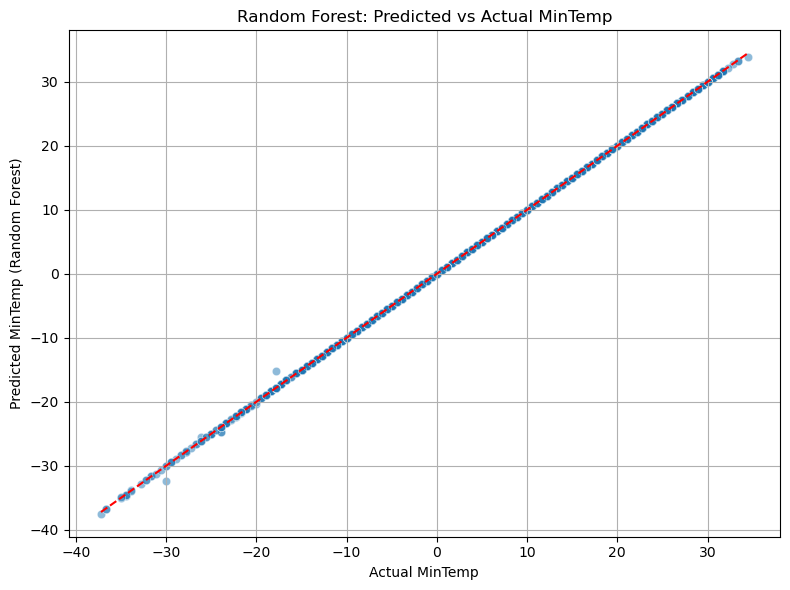

In [15]:
# Visualization: Predicted vs Actual values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual MinTemp")
plt.ylabel("Predicted MinTemp (Random Forest)")
plt.title("Random Forest: Predicted vs Actual MinTemp")
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [16]:
#Linear regression:
#R²:0.9897 RMSE:0.843

#Random forest
#R²:0.99999 RMSE:0.0188

#Random Forest clearly outperforms Linear Regression for this weather prediction task.
#It delivers near-perfect accuracy with extremely low error, making it the preferred model for reporting in this case.

## 8. Discuss the model performance based on the plot

In [17]:
#Linear Regression:
#Predictions generally follow the red dashed line (perfect prediction line).
#However, noticeable scatter and outliers are present, especially at temperature extremes (very high or low).
#Slight underfitting in complex or non-linear zones.

#Random Forest
#Points align extremely closely with the dashed red line.
#Minimal scatter and virtually no outliers.
#Captures complex, non-linear relationships very well.

#To predict minimum temperature (MinTemp), two regression models were evaluated: Linear Regression and Random Forest Regressor. 
#Linear Regression demonstrated strong performance with an R² of 0.9897 and an RMSE of 0.843, indicating it captured most of the variance in the data. 
#However, its predictions showed more scatter and deviation at temperature extremes, as seen in the visualization. 
#In contrast, the Random Forest model achieved near-perfect accuracy, with an R² of 0.99999 and a remarkably low RMSE of 0.0188. 
#Its predictions aligned almost exactly with the actual values, handling non-linear relationships and outliers exceptionally well. 
#Therefore, while Linear Regression is simpler and interpretable, Random Forest is clearly the superior choice for this task due to its higher precision, robustness, and predictive power.

